# Assignment 1: Feature analysis


## Load the Dataset

Load the dataset from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized saved as a csv file "CommViolPredUnnormalizedData.csv". The dataset has 147 features of which; 125 predictive, 4 non-predictive, 18 potential goal features. The goal feature to be taken is the assultPerPop feature which describes the number of assaults per 100,000 population.

In [209]:
# import the pandas library
import pandas as pd

# Load the dataset with headers
dataset = pd.read_csv("CommViolPredUnnormalizedData.csv", header=0)

# Get the shape of the dataset
print("Dataset Raw Shape:", dataset.shape)

# Print the headers to inspect them
print("Dataset Headers:", dataset.columns.tolist())


Dataset Raw Shape: (2215, 148)
Dataset Headers: ['Unnamed: 0', 'communityname', 'state', 'countyCode', 'communityCode', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImm

## Data cleaning, missing data and normalization

With the dataset additional variable information we are able to identify the non-predictive features and the potential goal attributes.


In [210]:

# Define a list of non-predictive headers
non_predicitive_headers = ['communityname', 'countyCode', 'communityCode', 'fold']

# Define a list of potential goal headers
goal_headers = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop']


# Combine both lists of headers and add the index column to be dropped
headers_to_drop = ['Unnamed: 0'] + non_predicitive_headers + goal_headers

# Check if the headers exist in the dataset
headers_to_drop = [header for header in headers_to_drop if header in dataset.columns]

# Drop the columns
dataset.drop(columns=headers_to_drop, inplace=True)

# Print the shape of the dataset after dropping columns
print("Dataset Shape after dropping columns:", dataset.shape)

Dataset Shape after dropping columns: (2215, 126)


### Handeling of State 

The state feature is the only feature that is not considered non-predictive and is a string categorical rather than a numerical one. So a defined dictionary is created to map the states to numerical values. This allows the dataset to be processed fully numerically. The states can always be mapped back to their original values if needed.

In [211]:
# Get the unique instances of the state column
states = dataset['state'].unique()

# Create a dictionary for each unique state and its corresponding numeric value
state_dict = {state: i for i, state in enumerate(states)}

# Map the state column to the dictionary
dataset['state'] = dataset['state'].map(state_dict)


### Handeling Missing Values 

1. Remove rows/columns with missing values. It is a simple implementation but can lead to a lot of data loss if there are many missing data occurances.

2. Foward or Backward Filling is the method of using previous or next column values (respectively). It is typicaly useful for sequential data.

3. Imputation is the filling of data using statistical methods such as the mean, median or mode. Simple to implement without loss of data. However, may cause biases if the data is not randomly missing.

4. Specified Algorthimns in the machine learning algorithm can handle the case of missing values. Being specific to the algorithmn can come as a advantage and a constraint.


**Imputation** was chosen because it retains all rows and columns, ensuring no data is lost. Its implementation is simple as we just take the mean for the numerical data and the most frequently occuring for the non-numerical.

The missing values from the goal feature are chosen to be completely ommited from both the goal and the dataset values. This will ensure true accuracy at the end. 

The dataset states that the main missing values come from controversy in some states providing full information. So a group of features have more missing values than informative ones. These values will be dropped completely as if they are handeled with imputation they will cause biases.

The rest of the missing values will use the imputation technique as it deems fit after these relevant changes.

In [212]:
from sklearn.impute import SimpleImputer
import numpy as np

# Change all the missing values indicated by '?' to np.nan
dataset = dataset.replace('?', np.nan)

# If there are any missing values in the goal column, drop the rows
# Print the missing values in the goal column
print("Number of goal missing values: ", dataset['assaultPerPop'].isnull().sum())

# Drop the rows with missing values in the goal column
dataset.dropna(subset=['assaultPerPop'], inplace=True)

# Print the number of missing values after dropping rows
print ("After dropping rows with missing values: ", dataset['assaultPerPop'].isnull().sum())

Number of goal missing values:  13
After dropping rows with missing values:  0


In [213]:
# Print the number of missing values in the dataset
print("Number of missing values before dropping missing heavy features: ", dataset.isnull().sum().sum())

# Dropping features with much more missing values than information values
greater_missing = ['LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','PolicBudgPerPop']

# Drop these columns 
dataset.drop(columns=greater_missing, inplace=True)

# Print the number of missing valuesafter dropping missing heavy features
print("Number of missing values after dropping missing heavy features: ", dataset.isnull().sum().sum())

Number of missing values before dropping missing heavy features:  41031
Number of missing values after dropping missing heavy features:  1


In [214]:

# Imputer (mean strategy)
imputer = SimpleImputer(strategy='mean')

# Apply the imputers using a fit_transform on the dataset
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

# Check for any remaining missing values
print("Number of missing values after imputation: ", dataset.isnull().sum().sum())

# Print the shape of the dataset after imputation
print("Dataset Shape after handling missing values:", dataset.shape)

Number of missing values after imputation:  0
Dataset Shape after handling missing values: (2202, 104)


### Normalization

Therefore, normalization transforms the data to a specific range or distribution, making it easier for machine learning algorithms to process. It ensures that each feature contributes equally to the model, preventing features with larger ranges from dominating the learning process. This is crutial in algorithmns such as the gradient-decent.

1. Min-Max Scaling transforms the data to a range [0,1] with a simple formulea. This preserves the relation between data and points on grapichal representations. However, it is sensitive to outlires that may come outside the original min/max.

2. Standardization transforms the data to have a mean of 0 and a standard deviation of 1. It is effective for algorithms that assume normally distributed data but is also sensitive to outliers.

3. Robust Scaling uses the median and interquartile range for scaling. This fixes the problem of outliers but makes it suffer from data that is not symettrically distributed.

4. Max Abs Scaling, scales each feature by its maximum absolute value. Particularly useful for data that is already centered at zero but does not handle outliers well either.



In [215]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the dataset
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Check the dataset
print(dataset.head())

      state  population  householdsize  racepctblack  racePctWhite  \
0 -1.291679   -0.198561       1.173512     -0.558277      0.473451   
1 -1.202081   -0.143471       0.336933     -0.598292      0.704281   
2 -1.112483   -0.112714      -0.828302     -0.602504      0.628759   
3 -1.022886   -0.175443      -0.917936     -0.535111      0.812693   
4 -0.933288   -0.202195       0.157666     -0.617246      0.313879   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
0      0.854098    -0.414205    -0.436226    -1.000901    -0.509074  ...   
1      0.171400    -0.484738    -0.758510    -1.023496    -0.584259  ...   
2      0.169169    -0.382020    -0.681250    -0.284298    -0.495708  ...   
3     -0.484526    -0.495010    -0.418566    -0.394048    -0.298557  ...   
4     -0.335046    -0.507336     2.210475     2.080169     2.458216  ...   

   PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0        0.394831         -0.466872        1.304955 

## Filter methods

### Colour Coded Correlation Matrix

Using pandas defined .corr() function to calculate the correlation matrix of the numeric columns in the dataset. We are easily able to see the correlation between the features in the dataset. These are then plotted using the seaborn library to create a heatmap of the correlation matrix. Where the color of the cell represents the correlation between the two features. The color map used is coolwarm, where red represents a positive correlation, blue represents a negative correlation, and white represents no correlation.

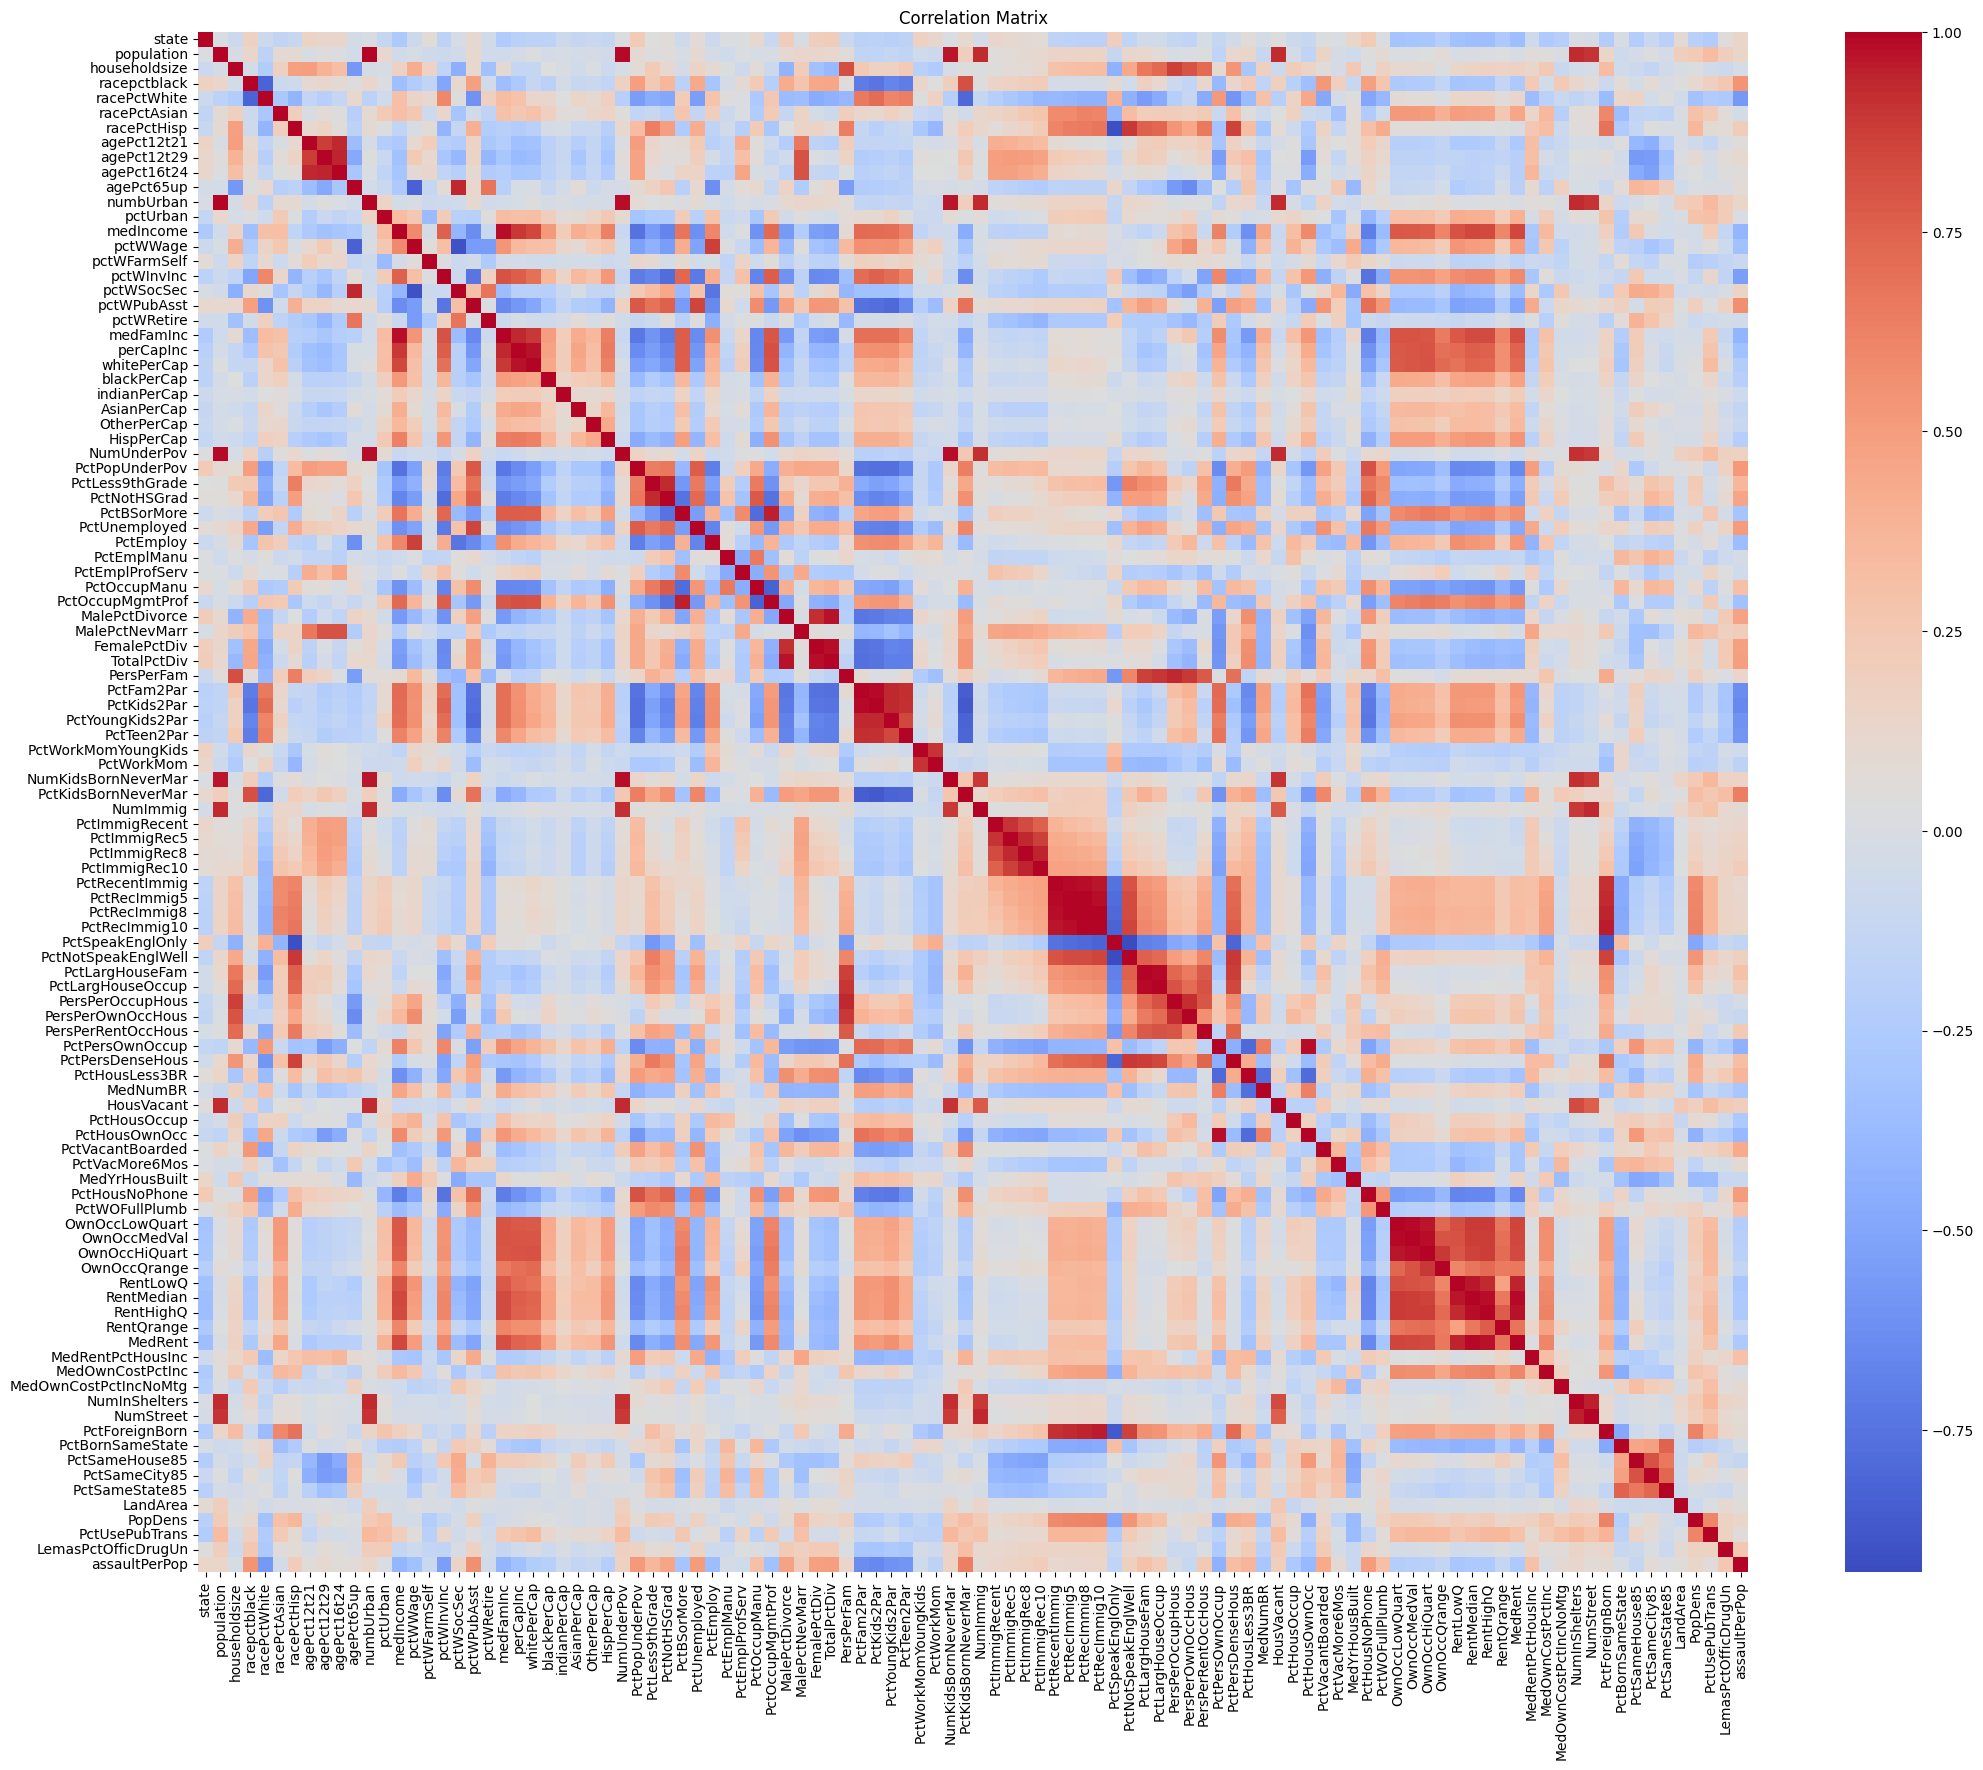

In [216]:
# Import the seaborn library for the heatmap
import seaborn as sns
# Import the matplotlib library for the color map
import matplotlib.pyplot as plt

# Set the goal feature as the correlation target
target = 'assaultPerPop'

# Define the correlation matrix
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()




### Selecting a threshold

When we calculated the correlation matrix, we found the index of mutual information between the features and the target variable. In general we dont want to select features that are highly correlated with each other as they will not add much value to the model and may even reduce the model's performance. So we need to select a threshold that is not too high to avoid selecting features that are highly correlated with each other and not too low to avoid selecting irrelevant features. 

1. Visually inspect the correlation matrix and select a threshold that makes sense based off the heatmap and the correlation values.

2. Knowing the area/domain of the data and the features, select a threshold that makes sense. So if police where to look at the dataset they could identify the features that are highly correlated with each other and select a threshold that makes sense.

3. Use common statistical thresholds, so between -1 and 1, a correlation of 0.7 is considered high, 0.5 is moderate and 0.3 is low. So you can select a threshold of 0.5 for example. These values have statistical significance and are commonly.

4. Itersatively select a threshold and evaluate the model's performance. So you can start with a threshold of 0.5 and evaluate the model's performance, then increase or decrease the threshold and evaluate the model's performance again. This is a trial and error method but it is effective.


Initially a common statistical threshold of 0.7 was chosen this is meant to be compared to absolute values so it acts as a -0.7 and a 0.7. This value was initially set.

In [217]:
# Set an initial threshold for the correlation
threshold = 0.5 # possible to be iteratively tested and optimized

# Keep track of columns that have already been dropped
dropped_columns = set()

# Get the highly correlated columns
high_correlation_features = correlation_matrix.index[abs(correlation_matrix['assaultPerPop']) > threshold].tolist()

# Remove the target feature from the list
high_correlation_features.remove(target)

# Print the highly correlated features
print("Highly correlated features: ", high_correlation_features)

Highly correlated features:  ['racepctblack', 'racePctWhite', 'pctWInvInc', 'pctWPubAsst', 'PctPopUnderPov', 'PctUnemployed', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctKidsBornNeverMar', 'PctHousNoPhone']


### Splitting the Dataset

The dataset now must be split into test and train sets. The split is done to ensure that the model is trained on a subset of the data and tested on another subset of the data. If this is not done, the model will be tested on the same data it was trained on, which will result in overfitting. Therefore, it is important to split the data into test and train sets ensuring there is no data leakage.

The decision of the split ratio is completely arbitrary and can be adjusted to ones liking. However, ideally you would want to have a larger training set than the test set. Common splits are 80/20 and 70/30. In this case, we will use an 80/20 split.

In [218]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
Y = dataset['assaultPerPop']
dataset.drop(columns=['assaultPerPop'])
X = dataset[high_correlation_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the shapes of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("---------------------------------")
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)



Training Features Shape: (1761, 12)
Testing Features Shape: (441, 12)
---------------------------------
Training Labels Shape: (1761,)
Testing Labels Shape: (441,)


### Training a neural network for prediction

The use of the sklearn MLPRegressor is similar to the MLPClassifier used in the previous example. The main difference is that the MLPRegressor is used for regression tasks, while the MLPClassifier is used for classification tasks. The MLPRegressor is used to predict continuous values and with it we are able to predict the number of assaults per population in this case.

In [219]:
# Import for the MLPRegressor
from sklearn.neural_network import MLPRegressor

# Train the neural network using the training set and the default parameters
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit the model to the training set
mlp.fit(X_train, y_train)

# Predict on the test set after fitting the model
y_pred = mlp.predict(X_test) 

/home/grahampelle/cce3503/cce3503-venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


The sklearn mean_squared_error function returns the MSE value. The lower the value, the better the model. 

In [220]:
# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print("Mean Squared Error: ", mse)

Mean Squared Error:  84410.47025951065
